## 1.ML Vs DL model comparision analysis on CIFAR10 dataset from Keras
## 2.Image Classification on CIFAR10 dataset from Keras

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Importing essential modules

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

### Loading the dataset

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

### Exploratory Data Analysis

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Turck']

In [10]:
def plot_sample(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

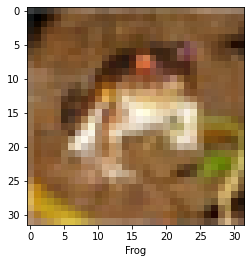

In [11]:
plot_sample(x_train,y_train,0)

### Prepocessing

In [12]:
x_train_3D=x_train.reshape(50000,1024,3)
x_test_3D=x_test.reshape(10000,1024,3)

print(x_train_3D.shape)
print(x_test_3D.shape)

x_train_3D=x_train_3D/255
x_test_3D=x_test_3D/255

(50000, 1024, 3)
(10000, 1024, 3)


In [13]:
x_train_2D=x_train.reshape(50000,3072)
x_test_2D=x_test.reshape(10000,3072)
print(x_train_2D.shape)
print(x_test_2D.shape)

(50000, 3072)
(10000, 3072)


In [14]:
x_train=x_train/255
x_test=x_test/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Models Used For Comparitive Analysis:
1.   Logistic Regression
2.   Random Forests
3.   Artificial Neural Network
4.   Convolutional Neural Network
5.   Long Short Term Memory
6.   Gated Recurrent Units


1. Logistic_Regression

A.Model Building & Fitting the Model with data

In [15]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train_2D,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

B.Model Evaluation

In [16]:
LR_eval=LR.score(x_test_2D,y_test)
LR_eval

0.4024

C.Classification Report

In [17]:
from sklearn.metrics import classification_report
y_pred_LR=LR.predict(x_test_2D)
y_pred_classes_LR=[np.argmax(element) for element in y_pred_LR]
print('Classification Report:\n',classification_report(y_test,y_pred_classes_LR))

Classification Report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


D.Confusion Matrix

In [18]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_LR)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

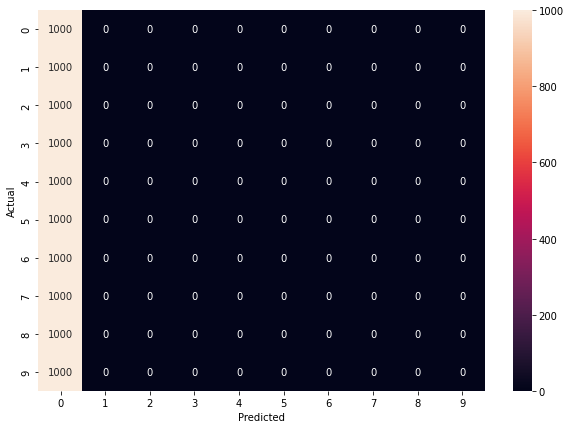

In [19]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

2. Random_Forests

A.Model Building & Fitting the Model with data

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=20)
RFC.fit(x_train_2D, y_train)

RandomForestClassifier(n_estimators=20)

B.Model Evaluation

In [21]:
RFC_eval=RFC.score(x_test_2D,y_test)
RFC_eval

0.4094

C.Classification Report

In [22]:
y_pred_RFC=RFC.predict(x_test_2D)
y_pred_classes_RFC=[np.argmax(element) for element in y_pred_RFC]
print('Classification Report:\n',classification_report(y_test,y_pred_classes_RFC))

Classification Report:
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


D.Confusion Matrix

In [23]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_RFC)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

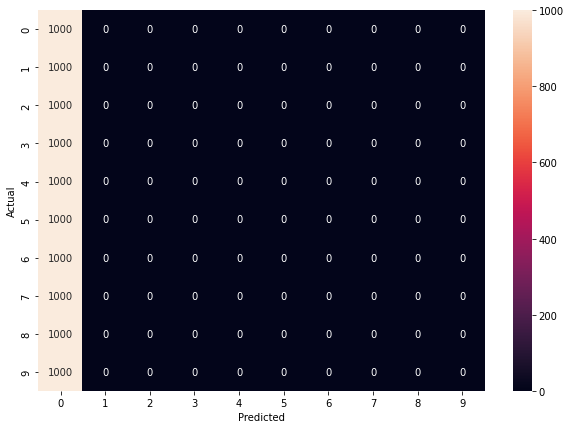

In [24]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

3. Artificail Neural Network

A.Model Building & Fitting the Model with data

In [25]:
ANN=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ANN.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ANN.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 1.8839 - accuracy: 0.3198
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6835 - accuracy: 0.3936
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5933 - accuracy: 0.4277
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5403 - accuracy: 0.4441
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4889 - accuracy: 0.4626
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4503 - accuracy: 0.4767
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4227 - accuracy: 0.4879
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3984 - accuracy: 0.4948
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3734 - accuracy: 0.5049
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.34

B.Model Evaluation

In [26]:
ANN_eval=ANN.evaluate(x_test,y_test)
ANN_eval

313/313 [==============================] - 1s 3ms/step - loss: 1.4574 - accuracy: 0.4794


[1.4574060440063477, 0.47940000891685486]

C.Classification Report

In [27]:
y_pred_ANN=ANN.predict(x_test)
y_pred_classes_ANN=[np.argmax(element) for element in y_pred_ANN]
print('Classification Report:\n',classification_report(y_test,y_pred_classes_ANN))

313/313 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.56      1000
           1       0.49      0.71      0.58      1000
           2       0.37      0.29      0.33      1000
           3       0.34      0.32      0.33      1000
           4       0.38      0.42      0.40      1000
           5       0.43      0.39      0.41      1000
           6       0.50      0.55      0.53      1000
           7       0.56      0.54      0.55      1000
           8       0.58      0.67      0.62      1000
           9       0.58      0.34      0.43      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



D.Confusion Matrix

In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_ANN)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[561,  68,  71,  20,  30,  12,  25,  30, 157,  26],
       [ 31, 707,   9,  22,  10,  16,  15,  18,  83,  89],
       [ 82,  39, 295,  95, 158,  93, 138,  64,  23,  13],
       [ 45,  47,  71, 322,  90, 201, 119,  49,  31,  25],
       [ 66,  14, 137,  69, 416,  40, 106, 110,  31,  11],
       [ 20,  32,  72, 207,  80, 388,  85,  76,  29,  11],
       [ 16,  24,  56,  88, 166,  42, 554,  28,  19,   7],
       [ 42,  42,  62,  58,  99,  77,  24, 537,  18,  41],
       [ 97,  93,  15,  34,  24,  17,  13,  11, 674,  22],
       [ 54, 366,  10,  27,  15,  22,  28,  38, 100, 340]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

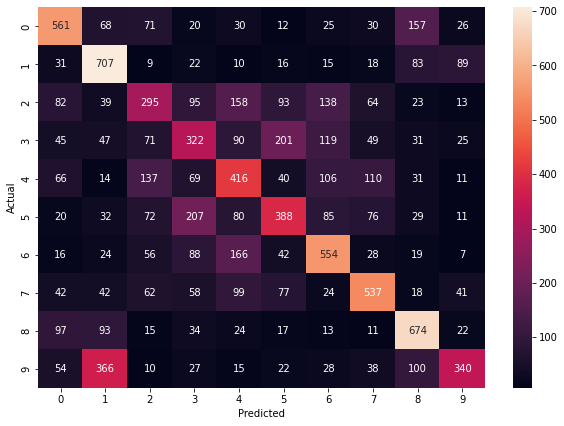

In [29]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

4. Convolutional Neural Network

A.Model Building & Fitting the Model with data

In [30]:
CNN=models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #Dense
    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

CNN.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

CNN.fit(x_test,y_test,epochs=10)

Epoch 1/10
313/313 [==============================] - 10s 9ms/step - loss: 1.8247 - accuracy: 0.3194
Epoch 2/10
313/313 [==============================] - 3s 8ms/step - loss: 1.3756 - accuracy: 0.5006
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 1.1213 - accuracy: 0.5938
Epoch 4/10
313/313 [==============================] - 3s 8ms/step - loss: 0.8710 - accuracy: 0.6863
Epoch 5/10
313/313 [==============================] - 3s 8ms/step - loss: 0.6025 - accuracy: 0.7891
Epoch 6/10
313/313 [==============================] - 3s 8ms/step - loss: 0.3830 - accuracy: 0.8673
Epoch 7/10
313/313 [==============================] - 3s 8ms/step - loss: 0.2255 - accuracy: 0.9239
Epoch 8/10
313/313 [==============================] - 3s 8ms/step - loss: 0.1518 - accuracy: 0.9478
Epoch 9/10
313/313 [==============================] - 3s 8ms/step - loss: 0.1352 - accuracy: 0.9561
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss: 0.1201 - accuracy: 0.961

B.Model Evaluation

In [31]:
CNN_eval=CNN.evaluate(x_test,y_test)
CNN_eval

313/313 [==============================] - 1s 3ms/step - loss: 0.1055 - accuracy: 0.9645


[0.1054881140589714, 0.9645000100135803]

C.Classification Report

In [32]:
y_pred_CNN=CNN.predict(x_test)
y_pred_classes_CNN=[np.argmax(element) for element in y_pred_CNN]
print('Classification Report:\n',classification_report(y_test,y_pred_classes_CNN))

313/313 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1000
           1       0.98      0.99      0.99      1000
           2       0.99      0.86      0.92      1000
           3       0.92      0.98      0.95      1000
           4       0.93      0.98      0.95      1000
           5       0.96      0.95      0.96      1000
           6       0.97      0.97      0.97      1000
           7       0.98      0.99      0.98      1000
           8       1.00      0.96      0.98      1000
           9       0.99      0.97      0.98      1000

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



D.Confusion Matrix

In [33]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_CNN)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[993,   0,   0,   6,   0,   0,   0,   0,   1,   0],
       [  6, 990,   0,   0,   0,   1,   3,   0,   0,   0],
       [ 27,   2, 856,  22,  57,  22,  11,   1,   0,   2],
       [  0,   0,   2, 985,   1,   2,  10,   0,   0,   0],
       [  3,   0,   2,  10, 976,   1,   2,   5,   1,   0],
       [  0,   0,   3,  27,   4, 951,   0,  15,   0,   0],
       [  0,   0,   0,  13,  10,   2, 973,   1,   0,   1],
       [  0,   0,   0,   1,   3,   3,   2, 990,   0,   1],
       [ 19,   2,   0,   7,   1,   2,   2,   1, 965,   1],
       [ 16,  12,   0,   2,   0,   2,   1,   1,   0, 966]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

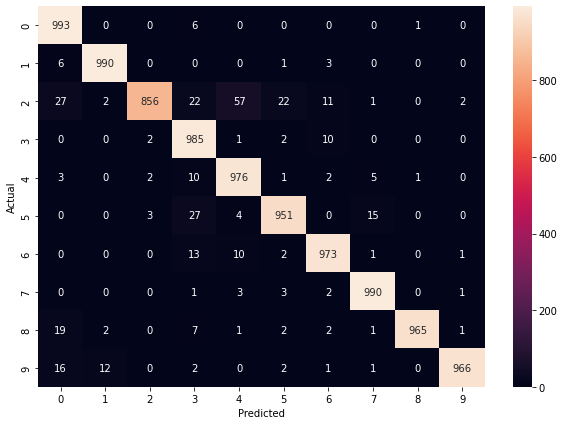

In [34]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

5. Long Short Term Memory

A.Model Building & Fitting the Model with data

In [35]:
model_LSTM = tf.keras.models.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, input_shape=(1024,3), return_sequences=True)),
                
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(3000, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])

model_LSTM.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=["accuracy"])
model_LSTM.fit(x_train_3D,y_train,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 163s 101ms/step - loss: 1.7582 - accuracy: 0.3858
Epoch 2/10
1563/1563 [==============================] - 163s 104ms/step - loss: 1.4389 - accuracy: 0.4856
Epoch 3/10
1563/1563 [==============================] - 160s 102ms/step - loss: 1.3098 - accuracy: 0.5338
Epoch 4/10
1563/1563 [==============================] - 159s 102ms/step - loss: 1.1975 - accuracy: 0.5721
Epoch 5/10
1563/1563 [==============================] - 159s 102ms/step - loss: 1.0899 - accuracy: 0.6113
Epoch 6/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.9732 - accuracy: 0.6512
Epoch 7/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.8525 - accuracy: 0.6919
Epoch 8/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.7150 - accuracy: 0.7440
Epoch 9/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.6034 - accuracy: 0.7853
Epoch 10/10
1563/1563 [=======================

B.Model Evaluation

In [36]:
LSTM_eval=model_LSTM.evaluate(x_test_3D,y_test)
LSTM_eval

313/313 [==============================] - 10s 30ms/step - loss: 1.7632 - accuracy: 0.5670


[1.7632086277008057, 0.5669999718666077]

C.Classification Report

In [37]:
y_pred_model_LSTM=model_LSTM.predict(x_test_3D)
y_pred_classes_model_LSTM=[np.argmax(element) for element in y_pred_model_LSTM]
print('Classification Report:\n',classification_report(y_test,y_pred_classes_model_LSTM))

313/313 [==============================] - 9s 27ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62      1000
           1       0.62      0.75      0.68      1000
           2       0.45      0.46      0.45      1000
           3       0.39      0.44      0.41      1000
           4       0.51      0.47      0.49      1000
           5       0.53      0.40      0.45      1000
           6       0.60      0.67      0.63      1000
           7       0.61      0.65      0.63      1000
           8       0.70      0.68      0.69      1000
           9       0.66      0.54      0.59      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



D.Confusion Matrix

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_model_LSTM)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[620,  56,  61,  29,  30,   9,  25,  30, 104,  36],
       [ 37, 746,  15,  21,   9,  10,  11,  16,  42,  93],
       [ 74,  21, 456,  81, 107,  62,  99,  69,  22,   9],
       [ 26,  22,  97, 442,  66, 146, 100,  54,  24,  23],
       [ 37,   7, 132,  85, 471,  35, 109,  92,  24,   8],
       [ 21,  10,  85, 248,  75, 399,  51,  85,   9,  17],
       [ 12,  11,  72,  96,  63,  29, 668,  22,   7,  20],
       [ 31,  15,  56,  68,  80,  46,  13, 653,   8,  30],
       [103,  82,  24,  28,  18,  11,  12,   8, 679,  35],
       [ 38, 231,  25,  36,  11,  10,  22,  35,  56, 536]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

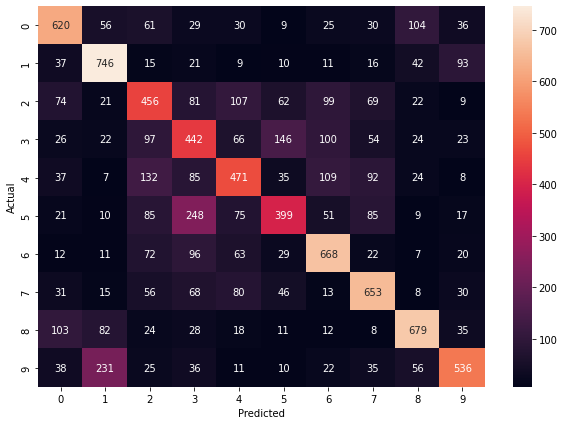

In [39]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6. Gated Recurrent Units

A.Model Building & Fitting the Model with data

In [40]:
model_GRU = tf.keras.models.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, input_shape=(1024,3), return_sequences=True)),
                
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(3000, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])

model_GRU.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=["accuracy"])
model_GRU.fit(x_train_3D, y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 160s 100ms/step - loss: 1.8975 - accuracy: 0.3743
Epoch 2/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.4695 - accuracy: 0.4752
Epoch 3/10
1563/1563 [==============================] - 156s 100ms/step - loss: 1.3361 - accuracy: 0.5259
Epoch 4/10
1563/1563 [==============================] - 156s 100ms/step - loss: 1.2226 - accuracy: 0.5640
Epoch 5/10
1563/1563 [==============================] - 156s 100ms/step - loss: 1.0895 - accuracy: 0.6105
Epoch 6/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.9453 - accuracy: 0.6626
Epoch 7/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.8079 - accuracy: 0.7123
Epoch 8/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.6629 - accuracy: 0.7631
Epoch 9/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.5367 - accuracy: 0.8088
Epoch 10/10
1563/1563 [=======================

B.Model Evaluation

In [41]:
GRU_eval=model_GRU.evaluate(x_test_3D,y_test)
GRU_eval

313/313 [==============================] - 10s 29ms/step - loss: 1.6879 - accuracy: 0.5823


[1.6878671646118164, 0.5823000073432922]

C.Classification Report

In [42]:
y_pred_model_GRU=model_GRU.predict(x_test_3D)
y_pred_classes_model_GRU=[np.argmax(element) for element in y_pred_model_GRU]
print('Classification Report:\n',classification_report(y_test,y_pred_classes_model_GRU))

313/313 [==============================] - 9s 27ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.63      1000
           1       0.72      0.67      0.69      1000
           2       0.47      0.53      0.50      1000
           3       0.43      0.32      0.37      1000
           4       0.51      0.51      0.51      1000
           5       0.43      0.53      0.48      1000
           6       0.68      0.62      0.65      1000
           7       0.63      0.68      0.65      1000
           8       0.71      0.71      0.71      1000
           9       0.67      0.58      0.62      1000

    accuracy                           0.58     10000
   macro avg       0.59      0.58      0.58     10000
weighted avg       0.59      0.58      0.58     10000



D.Confusion Matrix

In [43]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_model_GRU)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[671,  23,  84,  25,  26,  16,  17,  25,  80,  33],
       [ 58, 669,  14,  19,   8,  11,   9,  19,  48, 145],
       [ 67,   4, 525,  41, 107, 104,  52,  65,  21,  14],
       [ 36,  15,  85, 319,  85, 281,  71,  62,  25,  21],
       [ 37,   6, 129,  39, 509,  76,  64, 107,  27,   6],
       [ 29,  11,  89, 151,  57, 531,  41,  61,  17,  13],
       [ 16,  13,  89,  51, 114,  67, 618,  21,   5,   6],
       [ 33,  15,  52,  33,  58,  88,  10, 683,  11,  17],
       [110,  35,  25,  24,  19,  21,   9,  10, 714,  33],
       [ 74, 140,  28,  33,  13,  28,  12,  37,  51, 584]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

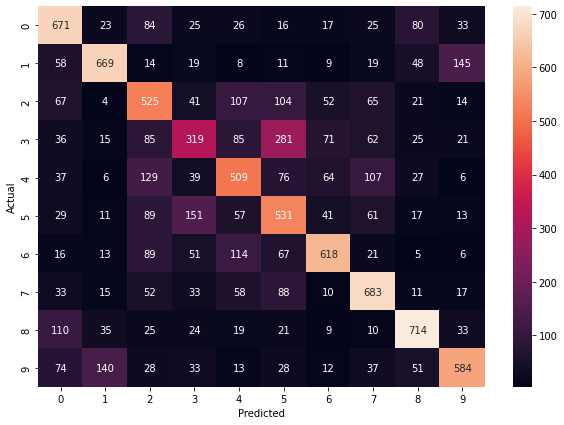

In [44]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Conclusion

From the above model results we can see that highest accuracy can be achieved by using Deep Learning Model specifically the CNN model which gives the accuracy of 98.73%.
Therefore use of CNN model for classification is viable.

Testing

In [47]:
CNN.predict(x_test)

313/313 [==============================] - 1s 3ms/step


array([[1.3131256e-08, 9.7763973e-08, 7.1038919e-08, ..., 9.6351705e-08,
        7.1379418e-08, 4.5632254e-07],
       [1.2121878e-06, 1.8365869e-05, 4.0332279e-11, ..., 1.3324542e-12,
        9.9998033e-01, 1.3443113e-07],
       [3.7646879e-02, 4.9847149e-04, 2.6056464e-04, ..., 1.1154056e-05,
        9.6101964e-01, 1.4526151e-04],
       ...,
       [1.2518205e-09, 1.2712496e-10, 1.5957550e-06, ..., 8.6129885e-06,
        1.3133539e-09, 6.3013994e-09],
       [1.7348721e-04, 9.9734372e-01, 2.7730896e-06, ..., 4.0153616e-05,
        2.4775360e-04, 5.5668246e-05],
       [1.2499132e-10, 1.5137711e-11, 1.0711246e-09, ..., 9.9971157e-01,
        2.5915455e-12, 6.3951716e-10]], dtype=float32)

In [48]:
y_test[0]

array([3], dtype=uint8)